<a href="https://colab.research.google.com/github/sc7-cloud/TFG---GOOGLE-COLAB-C-DIGOS-/blob/main/An%C3%A1lisis_Modelos_de_predicci%C3%B3n.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd


df_artistas = pd.read_excel('/content/Artistas.xlsx')
df_canciones = pd.read_excel('/content/Canciones.xlsx')


print(df_artistas.head())
print(df_canciones.head())

   Chartmetric ID         Artista  Artista ID            País          Región  \
0         1404155      Lola Young        1001     Reino Unido  Western Europe   
1          470449   Playboi Carti        1002  Estados Unidos   North America   
2            2007            Akon        1003         Senegal  Western Africa   
3            3544  Ellie Goulding        1004     Reino Unido  Western Europe   
4         1202489          GIVĒON        1005  Estados Unidos   North America   

      Continente      Solista/Grupo     Género 1    Género 2   Género 3  ...  \
0         Europe              Grupo          R&B    Folk Pop      Indie  ...   
1  North America  Artistas solistas  Hip-Hop/Rap     Pop Rap   Rage Rap  ...   
2         Africa  Artistas solistas  Hip-Hop/Rap         Pop   R&B/Soul  ...   
3         Europe  Artistas solistas   Electronic  Electropop  Indie Pop  ...   
4  North America  Artistas solistas          R&B         Pop   Neo-Soul  ...   

  Me gusta en TikTok Tasa de Par

In [ ]:

df_artistas['Artista ID'] = df_artistas['Artista ID'].astype('object')
df_artistas['Chartmetric ID'] = df_artistas['Chartmetric ID'].astype('object')

df_artistas[['Artista ID']].dtypes, df_canciones[['Chartmetric ID']].dtypes

(Artista ID    object
 dtype: object,
 Chartmetric ID    int64
 dtype: object)

In [ ]:
df_canciones['Chartmetric ID'] = df_canciones['Chartmetric ID'].astype('object')
df_canciones['Artista ID'] = df_canciones['Artista ID'].astype('object')

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score


In [ ]:

X = df_artistas[['Vistas en TikTok', 'Seguidores en TikTok', 'Tasa de Participación en TikTok',
                 'Publicaciones de TikTok', 'Conteo de las playlists en Spotify',
                 'Alcance de playlists en Spotify']]


y = df_artistas['Oyentes mensuales en Spotify']

In [ ]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:

model = LinearRegression()


model.fit(X_train, y_train)

LinearRegression()

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np


y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)


r2_train = r2_score(y_train, y_train_pred)
mae_train = mean_absolute_error(y_train, y_train_pred)
rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))


r2_test = r2_score(y_test, y_test_pred)
mae_test = mean_absolute_error(y_test, y_test_pred)
rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))


print(f"Entrenamiento - R²: {r2_train:.4f}, MAE: {mae_train:.4f}, RMSE: {rmse_train:.4f}")
print(f"Prueba - R²: {r2_test:.4f}, MAE: {mae_test:.4f}, RMSE: {rmse_test:.4f}")

Entrenamiento - R²: 0.7903, MAE: 2724930.5418, RMSE: 3880367.1026
Prueba - R²: 0.7898, MAE: 3459468.4036, RMSE: 5095901.2519


In [ ]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np
import matplotlib.pyplot as plt


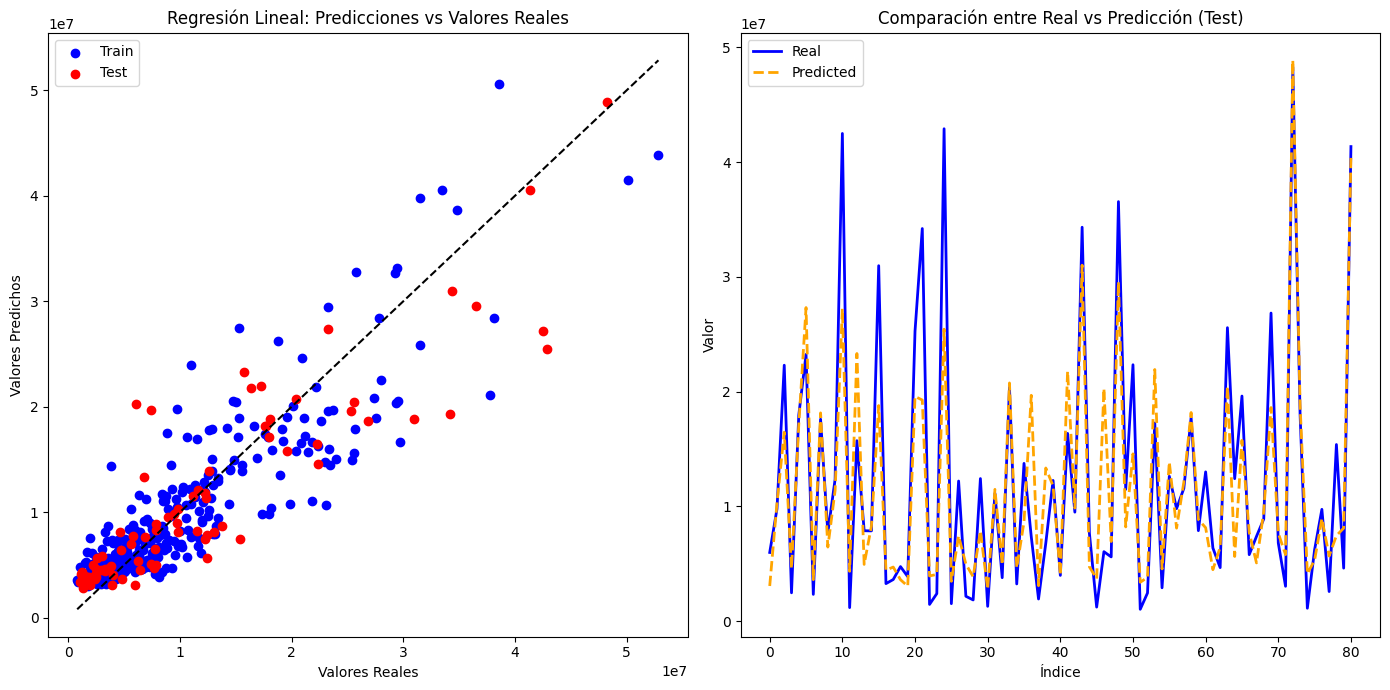

In [ ]:

plt.figure(figsize=(14, 7))


plt.subplot(1, 2, 1)
plt.scatter(y_train, y_train_pred, color='blue', label='Train')
plt.scatter(y_test, y_test_pred, color='red', label='Test')
plt.plot([y.min(), y.max()], [y.min(), y.max()], color='black', linestyle='--')
plt.xlabel('Valores Reales')
plt.ylabel('Valores Predichos')
plt.title('Regresión Lineal: Predicciones vs Valores Reales')
plt.legend()


plt.subplot(1, 2, 2)
plt.plot(y_test.values, label='Real', color='blue', linestyle='-', linewidth=2)
plt.plot(y_test_pred, label='Predicted', color='orange', linestyle='--', linewidth=2)
plt.xlabel('Índice')
plt.ylabel('Valor')
plt.title('Comparación entre Real vs Predicción (Test)')
plt.legend()

plt.tight_layout()
plt.show()

In [ ]:

variables_artistas_faltantes = ['Vistas en TikTok', 'Seguidores en TikTok', 'Tasa de Participación en TikTok',
                                'Publicaciones de TikTok', 'Conteo de las playlists en Spotify',
                                'Alcance de playlists en Spotify']

In [ ]:

coeficientes = model.coef_


import pandas as pd


importancia = pd.DataFrame({
    'Característica': variables_artistas_faltantes,
    'Coeficiente': coeficientes
})


importancia['Abs Coeficiente'] = importancia['Coeficiente'].abs()
importancia = importancia.sort_values(by='Abs Coeficiente', ascending=False)


print(importancia[['Característica', 'Coeficiente', 'Abs Coeficiente']])

                       Característica   Coeficiente  Abs Coeficiente
2     Tasa de Participación en TikTok  72071.527447     72071.527447
4  Conteo de las playlists en Spotify     -4.975834         4.975834
1                Seguidores en TikTok      0.180057         0.180057
3             Publicaciones de TikTok     -0.113700         0.113700
5     Alcance de playlists en Spotify      0.095434         0.095434
0                    Vistas en TikTok      0.000131         0.000131


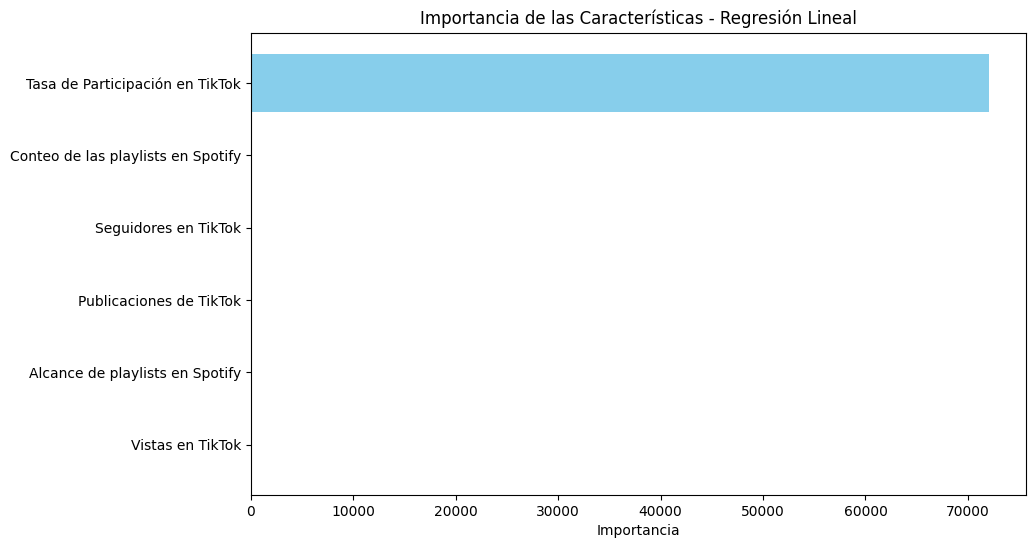

In [ ]:

plt.figure(figsize=(10, 6))
plt.barh(importancia['Característica'], importancia['Abs Coeficiente'], color='skyblue')
plt.xlabel('Importancia')
plt.title('Importancia de las Características - Regresión Lineal')
plt.gca().invert_yaxis()
plt.show()


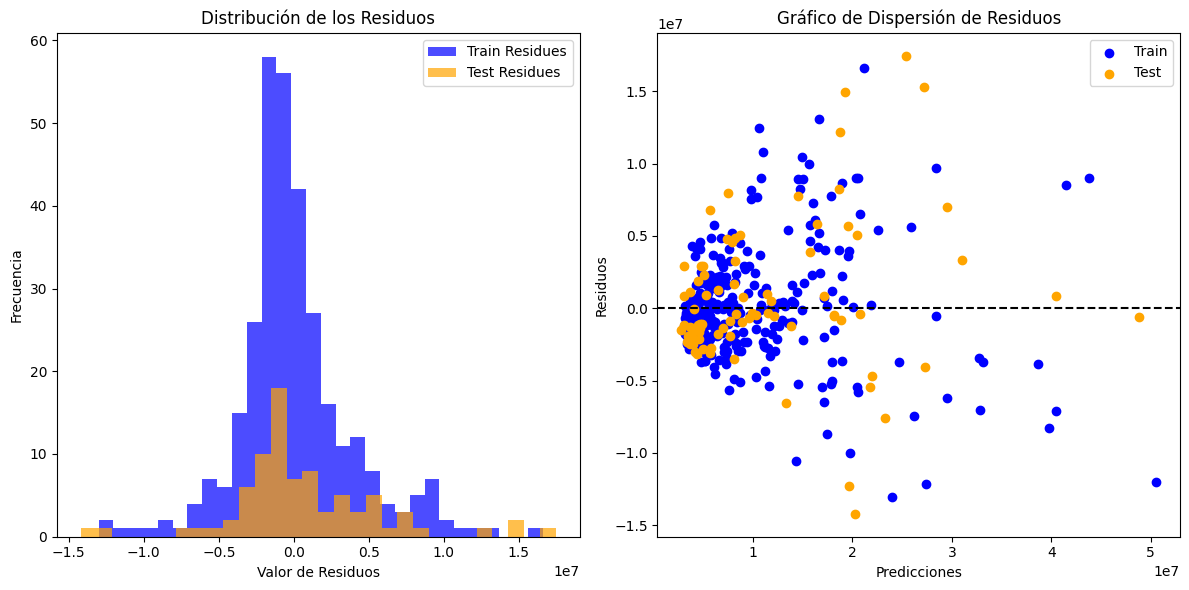

In [ ]:

residuos_train = y_train - y_train_pred
residuos_test = y_test - y_test_pred


plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.hist(residuos_train, bins=30, color='blue', alpha=0.7, label='Train Residues')
plt.hist(residuos_test, bins=30, color='orange', alpha=0.7, label='Test Residues')
plt.title('Distribución de los Residuos')
plt.xlabel('Valor de Residuos')
plt.ylabel('Frecuencia')
plt.legend()


plt.subplot(1, 2, 2)
plt.scatter(y_train_pred, residuos_train, color='blue', label='Train')
plt.scatter(y_test_pred, residuos_test, color='orange', label='Test')
plt.axhline(y=0, color='black', linestyle='--')
plt.title('Gráfico de Dispersión de Residuos')
plt.xlabel('Predicciones')
plt.ylabel('Residuos')
plt.legend()

plt.tight_layout()
plt.show()


In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np


In [ ]:

rf_model = RandomForestRegressor(n_estimators=200, max_depth=None, min_samples_split=29, min_samples_leaf=1, random_state=42, max_features='log2', bootstrap=True)


rf_model.fit(X_train, y_train)

RandomForestRegressor(max_features='log2', min_samples_split=29,
                      n_estimators=200, random_state=42)

In [ ]:

y_train_pred_rf = rf_model.predict(X_train)
y_test_pred_rf = rf_model.predict(X_test)


r2_train_rf = r2_score(y_train, y_train_pred_rf)
mae_train_rf = mean_absolute_error(y_train, y_train_pred_rf)
rmse_train_rf = np.sqrt(mean_squared_error(y_train, y_train_pred_rf))


r2_test_rf = r2_score(y_test, y_test_pred_rf)
mae_test_rf = mean_absolute_error(y_test, y_test_pred_rf)
rmse_test_rf = np.sqrt(mean_squared_error(y_test, y_test_pred_rf))


print(f"Entrenamiento - Random Forest - R²: {r2_train_rf:.4f}, MAE: {mae_train_rf:.4f}, RMSE: {rmse_train_rf:.4f}")
print(f"Prueba - Random Forest - R²: {r2_test_rf:.4f}, MAE: {mae_test_rf:.4f}, RMSE: {rmse_test_rf:.4f}")

Entrenamiento - Random Forest - R²: 0.7989, MAE: 2494496.5822, RMSE: 3800189.5956
Prueba - Random Forest - R²: 0.7036, MAE: 3681860.3444, RMSE: 6052395.0535


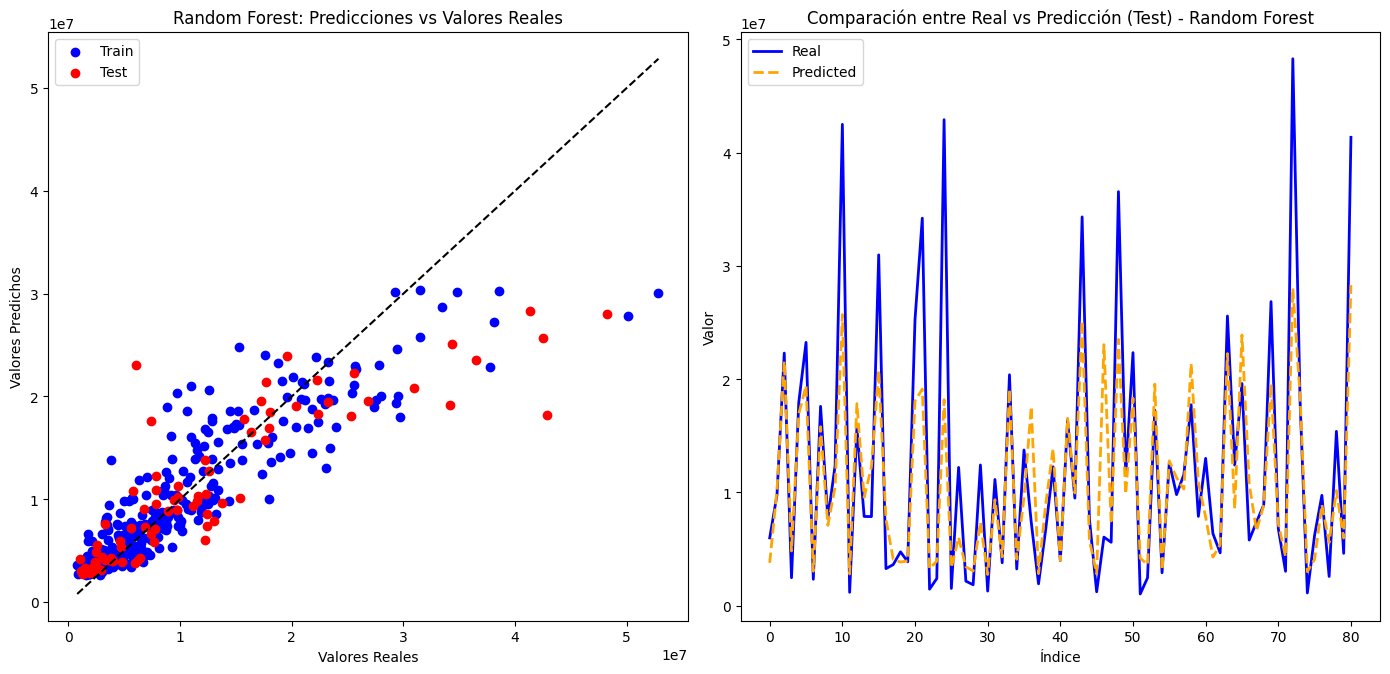

In [ ]:

plt.figure(figsize=(14, 7))


plt.subplot(1, 2, 1)
plt.scatter(y_train, y_train_pred_rf, color='blue', label='Train')
plt.scatter(y_test, y_test_pred_rf, color='red', label='Test')
plt.plot([y.min(), y.max()], [y.min(), y.max()], color='black', linestyle='--')
plt.xlabel('Valores Reales')
plt.ylabel('Valores Predichos')
plt.title('Random Forest: Predicciones vs Valores Reales')
plt.legend()


plt.subplot(1, 2, 2)
plt.plot(y_test.values, label='Real', color='blue', linestyle='-', linewidth=2)
plt.plot(y_test_pred_rf, label='Predicted', color='orange', linestyle='--', linewidth=2)
plt.xlabel('Índice')
plt.ylabel('Valor')
plt.title('Comparación entre Real vs Predicción (Test) - Random Forest')
plt.legend()

plt.tight_layout()
plt.show()

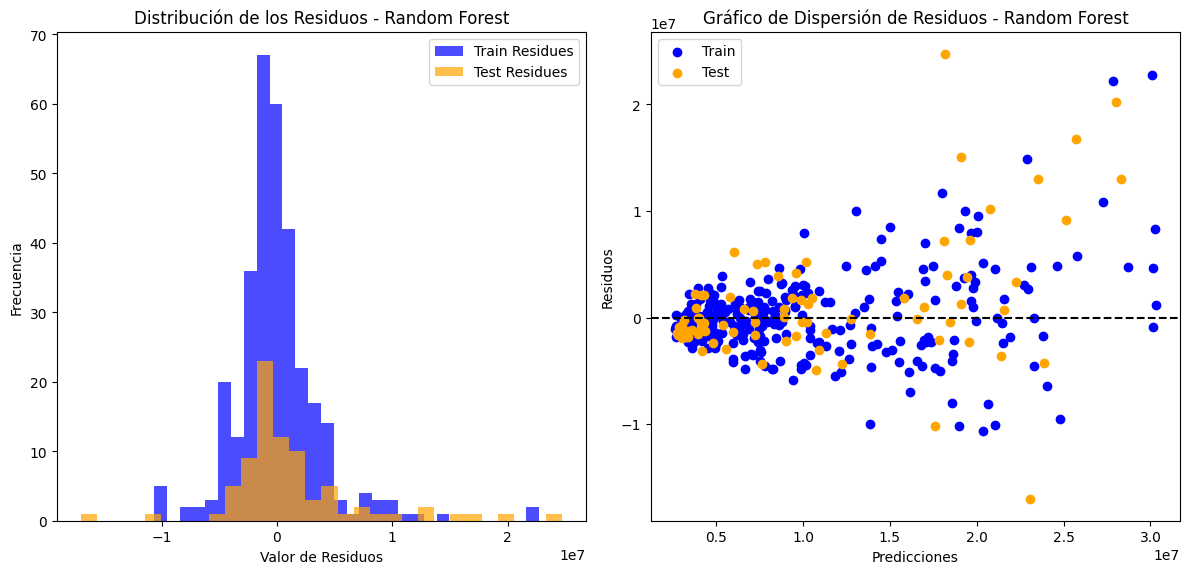

In [ ]:

residuos_train_rf = y_train - y_train_pred_rf
residuos_test_rf = y_test - y_test_pred_rf


plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.hist(residuos_train_rf, bins=30, color='blue', alpha=0.7, label='Train Residues')
plt.hist(residuos_test_rf, bins=30, color='orange', alpha=0.7, label='Test Residues')
plt.title('Distribución de los Residuos - Random Forest')
plt.xlabel('Valor de Residuos')
plt.ylabel('Frecuencia')
plt.legend()


plt.subplot(1, 2, 2)
plt.scatter(y_train_pred_rf, residuos_train_rf, color='blue', label='Train')
plt.scatter(y_test_pred_rf, residuos_test_rf, color='orange', label='Test')
plt.axhline(y=0, color='black', linestyle='--')
plt.title('Gráfico de Dispersión de Residuos - Random Forest')
plt.xlabel('Predicciones')
plt.ylabel('Residuos')
plt.legend()

plt.tight_layout()
plt.show()


                       Característica  Importancia
5     Alcance de playlists en Spotify     0.505814
4  Conteo de las playlists en Spotify     0.262750
0                    Vistas en TikTok     0.130968
3             Publicaciones de TikTok     0.069478
2     Tasa de Participación en TikTok     0.020272
1                Seguidores en TikTok     0.010718


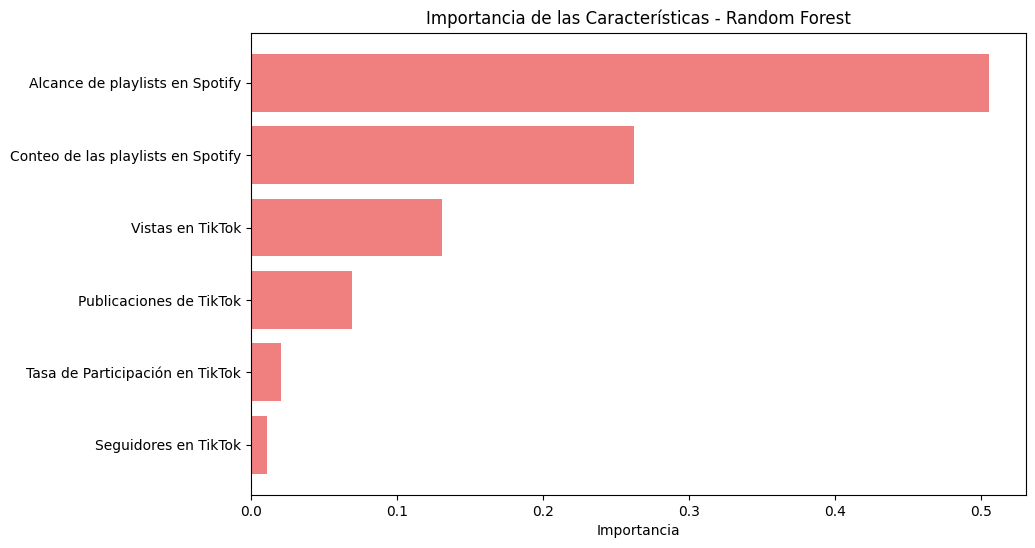

In [ ]:

importancia_rf = pd.DataFrame({
    'Característica': X.columns,
    'Importancia': rf_model.feature_importances_
})


importancia_rf = importancia_rf.sort_values(by='Importancia', ascending=False)


print(importancia_rf)


plt.figure(figsize=(10, 6))
plt.barh(importancia_rf['Característica'], importancia_rf['Importancia'], color='lightcoral')
plt.xlabel('Importancia')
plt.title('Importancia de las Características - Random Forest')
plt.gca().invert_yaxis()
plt.show()


In [ ]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np
import matplotlib.pyplot as plt


In [ ]:

gb_model = GradientBoostingRegressor( n_estimators=750,random_state=42,subsample=1,min_samples_split=12,min_samples_leaf=10,max_depth=2,learning_rate=0.0155)



gb_model.fit(X_train, y_train)


GradientBoostingRegressor(learning_rate=0.0155, max_depth=2,
                          min_samples_leaf=10, min_samples_split=12,
                          n_estimators=750, random_state=42, subsample=1)

In [ ]:

y_train_pred_gb = gb_model.predict(X_train)
y_test_pred_gb = gb_model.predict(X_test)


r2_train_gb = r2_score(y_train, y_train_pred_gb)
mae_train_gb = mean_absolute_error(y_train, y_train_pred_gb)
rmse_train_gb = np.sqrt(mean_squared_error(y_train, y_train_pred_gb))


r2_test_gb = r2_score(y_test, y_test_pred_gb)
mae_test_gb = mean_absolute_error(y_test, y_test_pred_gb)
rmse_test_gb = np.sqrt(mean_squared_error(y_test, y_test_pred_gb))


print(f"Entrenamiento - Gradient Boosting - R²: {r2_train_gb:.4f}, MAE: {mae_train_gb:.4f}, RMSE: {rmse_train_gb:.4f}")
print(f"Prueba - Gradient Boosting - R²: {r2_test_gb:.4f}, MAE: {mae_test_gb:.4f}, RMSE: {rmse_test_gb:.4f}")

Entrenamiento - Gradient Boosting - R²: 0.8789, MAE: 1954034.4887, RMSE: 2948834.2731
Prueba - Gradient Boosting - R²: 0.7820, MAE: 3307255.3630, RMSE: 5190559.1709


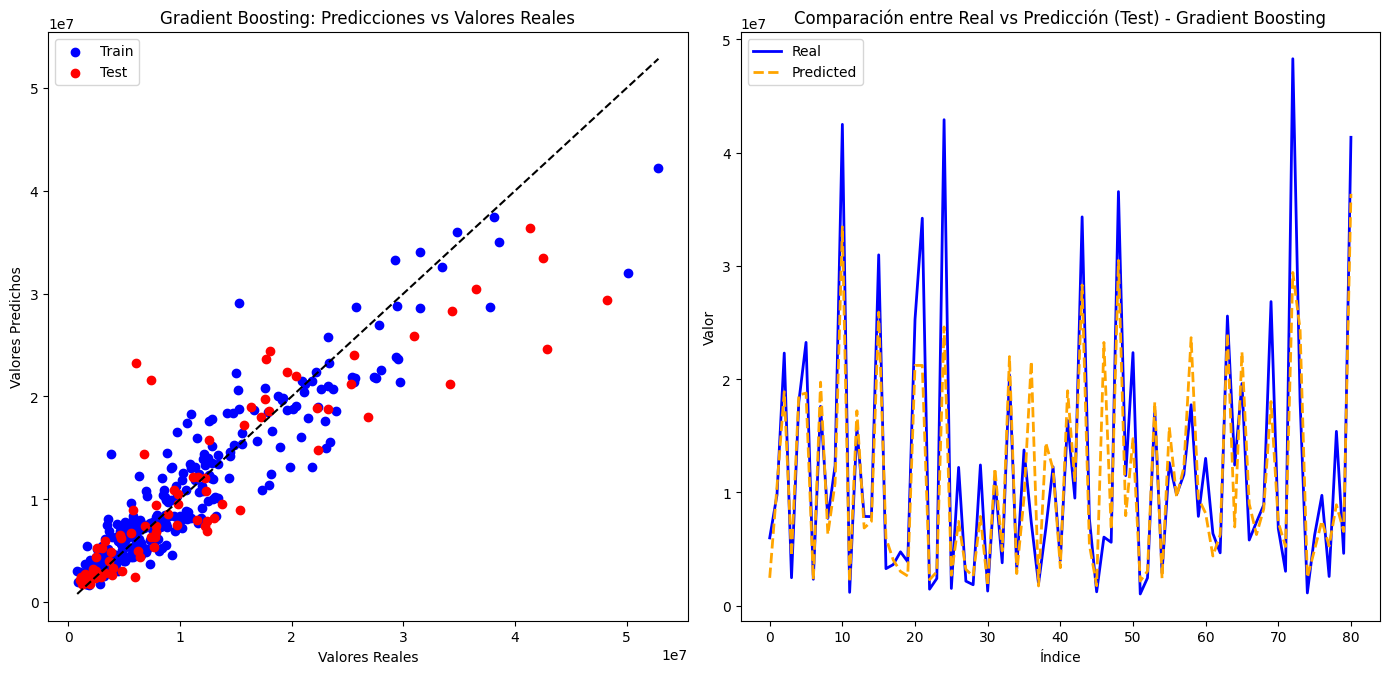

In [ ]:

y_train_pred_gb = gb_model.predict(X_train)
y_test_pred_gb = gb_model.predict(X_test)


residuos_train_gb = y_train - y_train_pred_gb
residuos_test_gb = y_test - y_test_pred_gb


plt.figure(figsize=(14, 7))


plt.subplot(1, 2, 1)
plt.scatter(y_train, y_train_pred_gb, color='blue', label='Train')
plt.scatter(y_test, y_test_pred_gb, color='red', label='Test')
plt.plot([y.min(), y.max()], [y.min(), y.max()], color='black', linestyle='--')
plt.xlabel('Valores Reales')
plt.ylabel('Valores Predichos')
plt.title('Gradient Boosting: Predicciones vs Valores Reales')
plt.legend()


plt.subplot(1, 2, 2)
plt.plot(y_test.values, label='Real', color='blue', linestyle='-', linewidth=2)
plt.plot(y_test_pred_gb, label='Predicted', color='orange', linestyle='--', linewidth=2)
plt.xlabel('Índice')
plt.ylabel('Valor')
plt.title('Comparación entre Real vs Predicción (Test) - Gradient Boosting')
plt.legend()

plt.tight_layout()
plt.show()

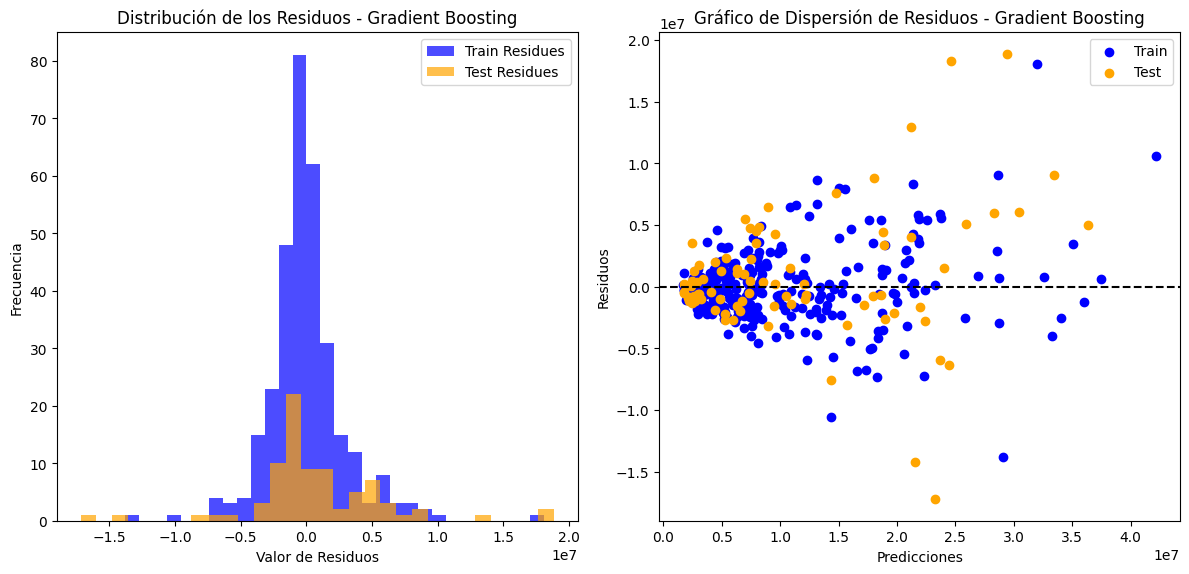

In [ ]:

plt.figure(figsize=(12, 6))


plt.subplot(1, 2, 1)
plt.hist(residuos_train_gb, bins=30, color='blue', alpha=0.7, label='Train Residues')
plt.hist(residuos_test_gb, bins=30, color='orange', alpha=0.7, label='Test Residues')
plt.title('Distribución de los Residuos - Gradient Boosting')
plt.xlabel('Valor de Residuos')
plt.ylabel('Frecuencia')
plt.legend()


plt.subplot(1, 2, 2)
plt.scatter(y_train_pred_gb, residuos_train_gb, color='blue', label='Train')
plt.scatter(y_test_pred_gb, residuos_test_gb, color='orange', label='Test')
plt.axhline(y=0, color='black', linestyle='--')
plt.title('Gráfico de Dispersión de Residuos - Gradient Boosting')
plt.xlabel('Predicciones')
plt.ylabel('Residuos')
plt.legend()

plt.tight_layout()
plt.show()